<img src="agri_image2.png" alt="Sample Image" width="900" height="200">

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

In [99]:
#Importing the data
df = pd.read_csv("co2_emissions_from_agri.csv")
#Show preview of data
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

In [101]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [102]:
# Convert year to integer
df['year'] = df['year'].astype(int)

# Convert population columns to integer
population_columns = ['rural_population', 'urban_population', 'total_population_-_male', 'total_population_-_female']
for column in population_columns:
    df[column] = df[column].astype(int)


In [103]:
# Ensure each row is a unique country-year observation
df.drop_duplicates(subset=['area', 'year'], inplace=True)

In [104]:
# Fill missing values: 0 for numeric columns, 'Unknown' for object (text) columns
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna('Unknown')
    else:
        df[column] = df[column].fillna(0)

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

C:\Users\nb108869\AppData\Local\Temp\ipykernel_30616\443676534.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_emissions.values, y=avg_emissions.index, palette='viridis')


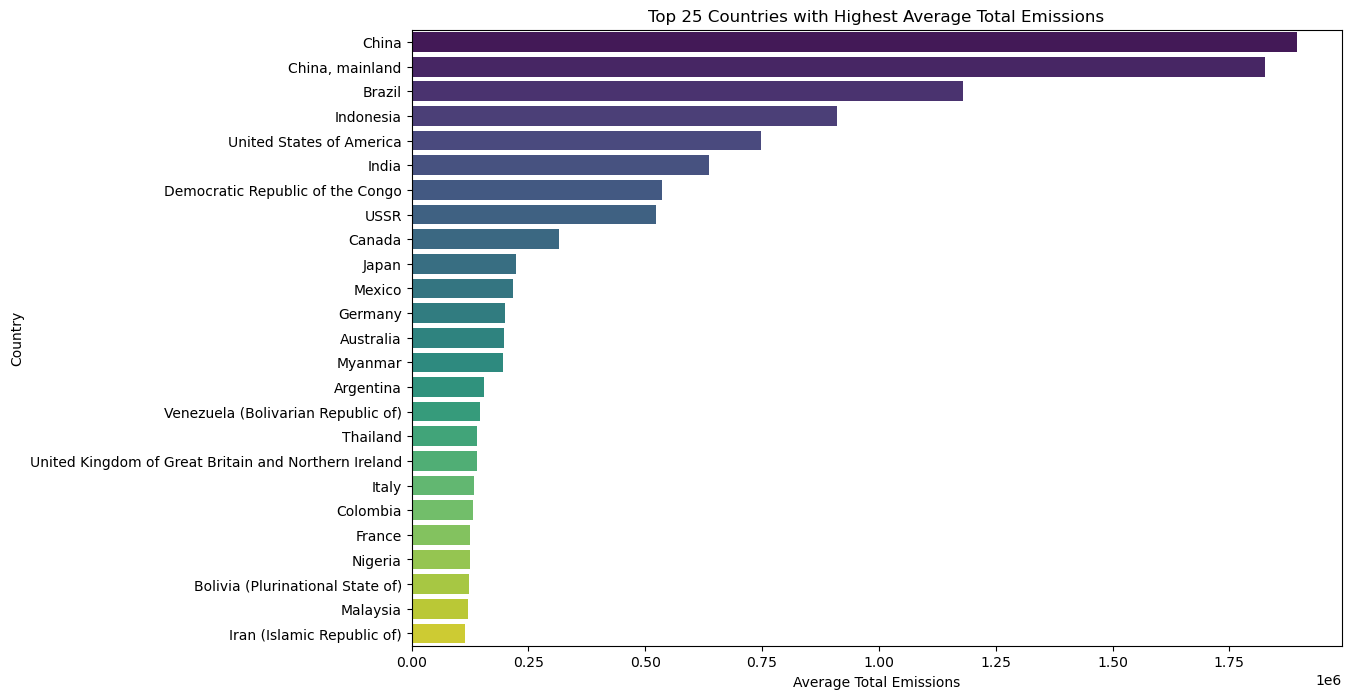

In [106]:
# Top 25 countries with highest average total emissions
avg_emissions = df.groupby('area')['total_emission'].mean().sort_values(ascending=False).head(25)
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_emissions.values, y=avg_emissions.index, palette='viridis')
plt.title('Top 25 Countries with Highest Average Total Emissions')
plt.xlabel('Average Total Emissions')
plt.ylabel('Country')
plt.show()

#Top 25 Countries by Average Emissions. Identify which countries contribute most to emissions on average

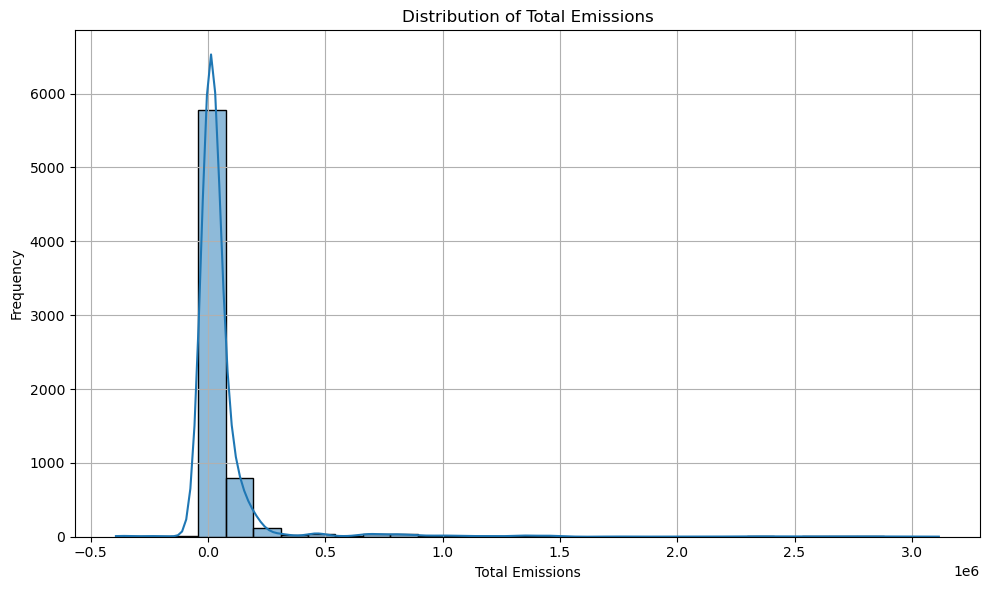

In [107]:
plt.figure(figsize=(10, 6))
sns.histplot(df['total_emission'], kde=True, bins=30)
plt.title('Distribution of Total Emissions')
plt.xlabel('Total Emissions')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

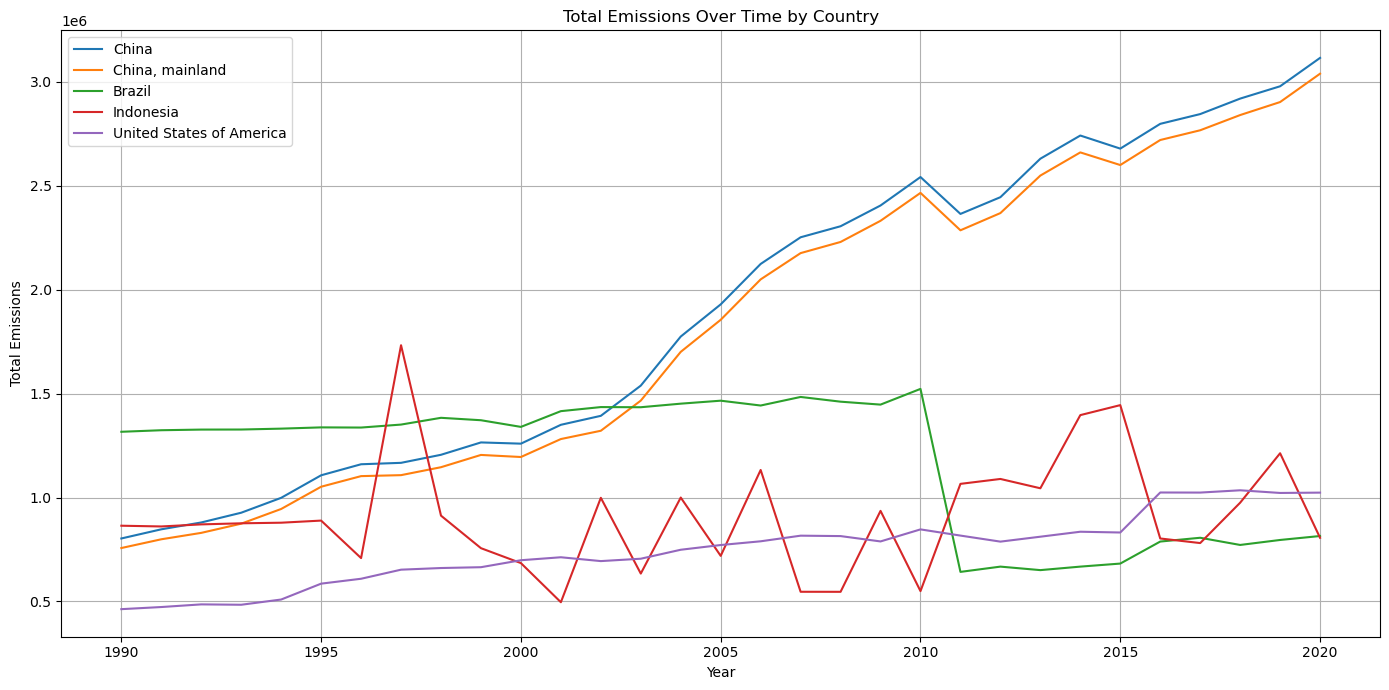

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('co2_emissions_from_agri.csv')

# Selected countries
selected_countries = ['China', 'China, mainland', 'Brazil', 'Indonesia', 'United States of America']

# Plot total emissions over time
plt.figure(figsize=(14, 7))
for country in selected_countries:
    country_data = df[df['Area'] == country]
    plt.plot(country_data['Year'], country_data['total_emission'], label=country)

plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.title('Total Emissions Over Time by Country')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

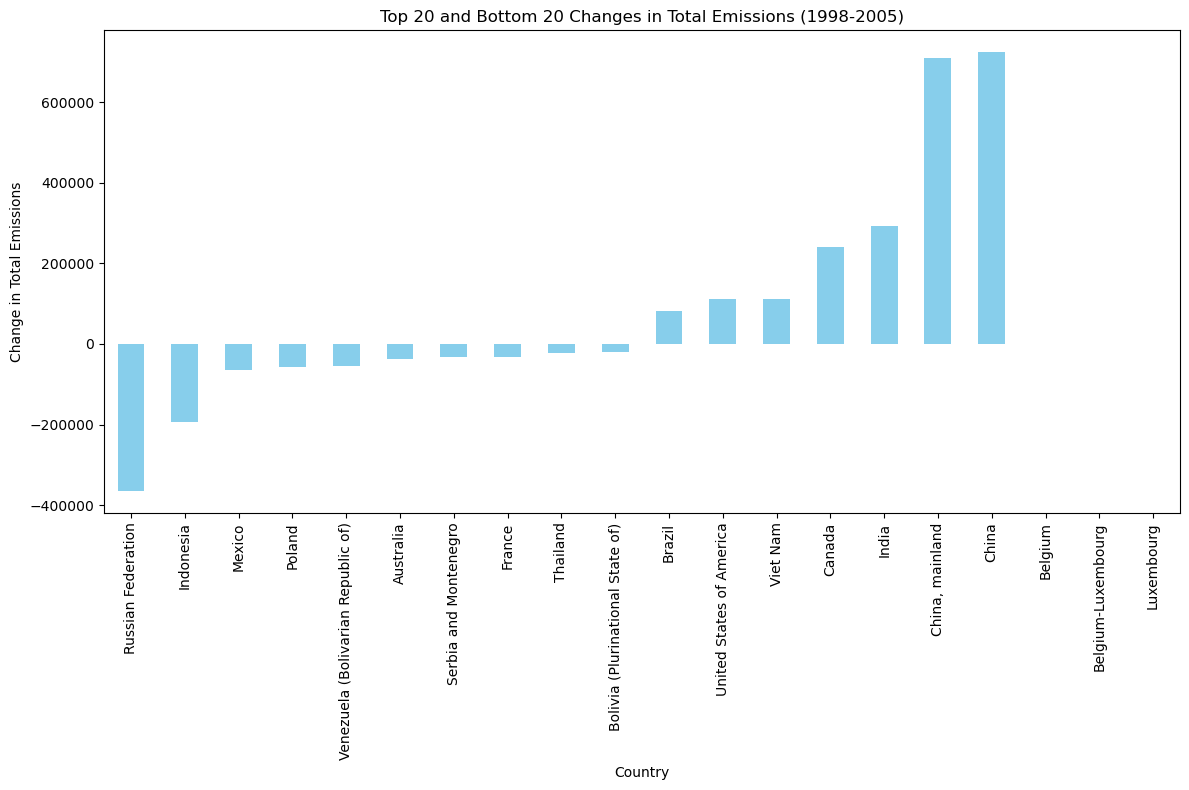

In [109]:
# Filter the data for the years 1998 and 2005
filtered_data_1998 = df[df['Year'] == 1998]
filtered_data_2005 = df[df['Year'] == 2005]

# Calculate the changes in total emissions for each country between 1998 and 2005
emission_changes = filtered_data_2005.set_index('Area')['total_emission'] - filtered_data_1998.set_index('Area')['total_emission']

# Sort the emission changes for better visualization
emission_changes_sorted = emission_changes.sort_values()

# Select the top 10 and bottom 10 countries
top_10 = emission_changes_sorted.head(10)
bottom_10 = emission_changes_sorted.tail(10)

# Combine the top 10 and bottom 20 countries
combined_emission_changes = pd.concat([top_10, bottom_10])

# Plot the changes in total emissions
plt.figure(figsize=(12, 8))
combined_emission_changes.plot(kind='bar', color='skyblue')
plt.title('Top 20 and Bottom 20 Changes in Total Emissions (1998-2005)')
plt.xlabel('Country')
plt.ylabel('Change in Total Emissions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [110]:
# Cell 6: Exploratory Data Analysis (EDA) - Summary statistics
summary_stats = df.describe()
print("Summary statistics:\n", summary_stats)


Summary statistics:
               Year  Savanna fires  Forest fires  Crop Residues  \
count  6965.000000    6934.000000   6872.000000    5576.000000   
mean   2005.124910    1188.390893    919.302167     998.706309   
std       8.894665    5246.287783   3720.078752    3700.345330   
min    1990.000000       0.000000      0.000000       0.000200   
25%    1997.000000       0.000000      0.000000      11.006525   
50%    2005.000000       1.651850      0.517900     103.698200   
75%    2013.000000     111.081400     64.950775     377.640975   
max    2020.000000  114616.401100  52227.630600   33490.074100   

       Rice Cultivation  Drained organic soils (CO2)  \
count       6965.000000                  6965.000000   
mean        4259.666673                  3503.228636   
std        17613.825187                 15861.445678   
min            0.000000                     0.000000   
25%          181.260800                     0.000000   
50%          534.817400                     0.00

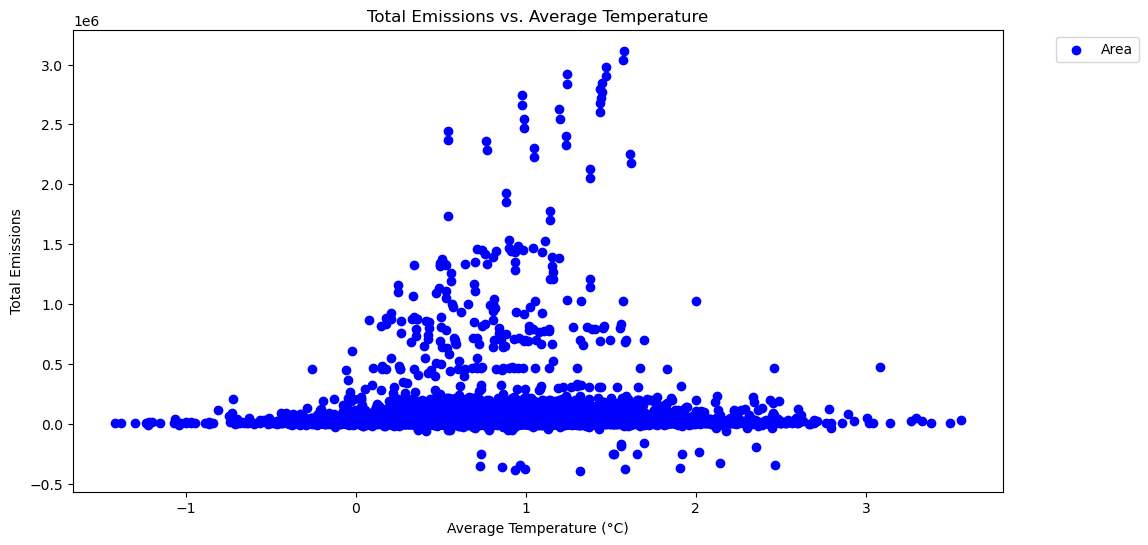

In [111]:
# Cell 9: EDA - Identify patterns (Total Emissions vs. Average Temperature)
plt.figure(figsize=(12, 6))
plt.scatter(df['Average Temperature °C'], df['total_emission'], c='blue', label='Area')
plt.title('Total Emissions vs. Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Total Emissions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


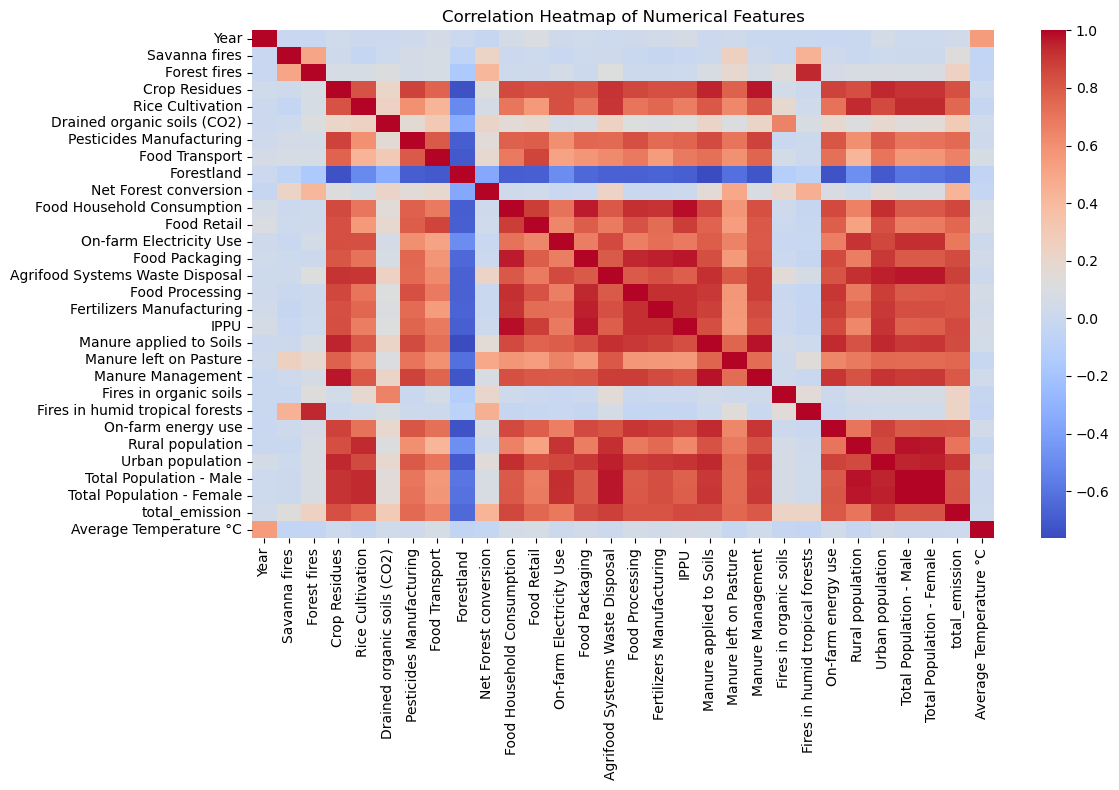

In [112]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

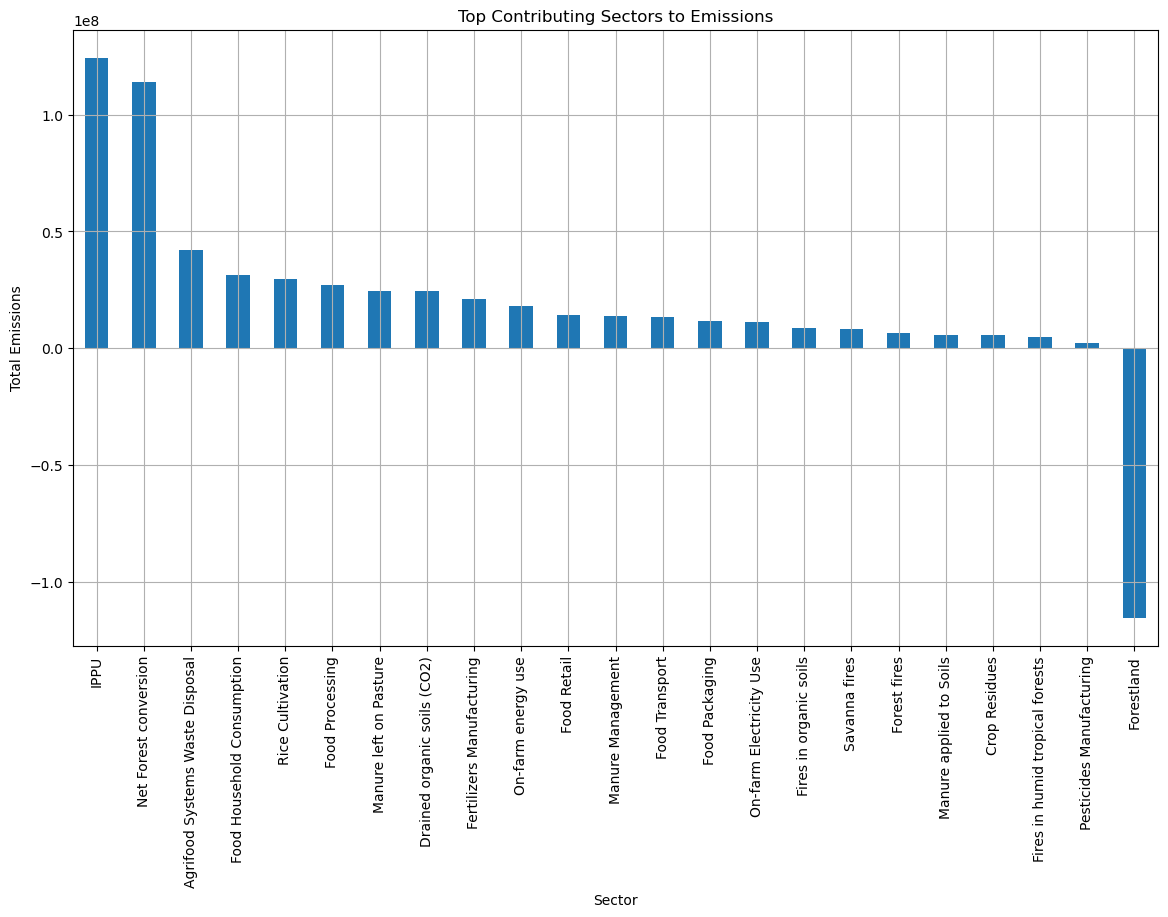

In [113]:
#Top Contributing Sectors to Emissions
sector_columns = [
    'Savanna fires', 'Forest fires', 'Crop Residues', 'Rice Cultivation',
    'Drained organic soils (CO2)', 'Pesticides Manufacturing', 'Food Transport',
    'Forestland', 'Net Forest conversion', 'Food Household Consumption',
    'Food Retail', 'On-farm Electricity Use', 'Food Packaging',
    'Agrifood Systems Waste Disposal', 'Food Processing', 'Fertilizers Manufacturing',
    'IPPU', 'Manure applied to Soils', 'Manure left on Pasture', 'Manure Management',
    'Fires in organic soils', 'Fires in humid tropical forests', 'On-farm energy use'
]

total_emissions_by_sector = df[sector_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
total_emissions_by_sector.plot(kind='bar')
plt.title('Top Contributing Sectors to Emissions')
plt.xlabel('Sector')
plt.ylabel('Total Emissions')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

#reveals the dominant sources of emissions, such as Manure Management, Rice Cultivation, or Food Processing.

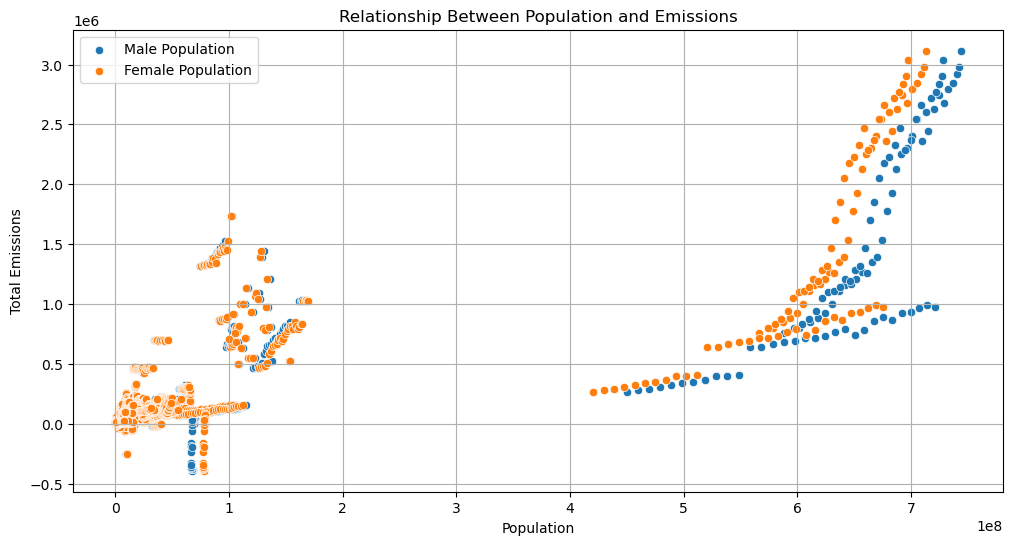

In [114]:
#Relationship Between Population and Emissions
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Total Population - Male', y='total_emission', label='Male Population')
sns.scatterplot(data=df, x='Total Population - Female', y='total_emission', label='Female Population')
plt.title('Relationship Between Population and Emissions')
plt.xlabel('Population')
plt.ylabel('Total Emissions')
plt.legend()
plt.grid(True)
plt.show()

#emissions are proportional to population or if some countries are more efficient

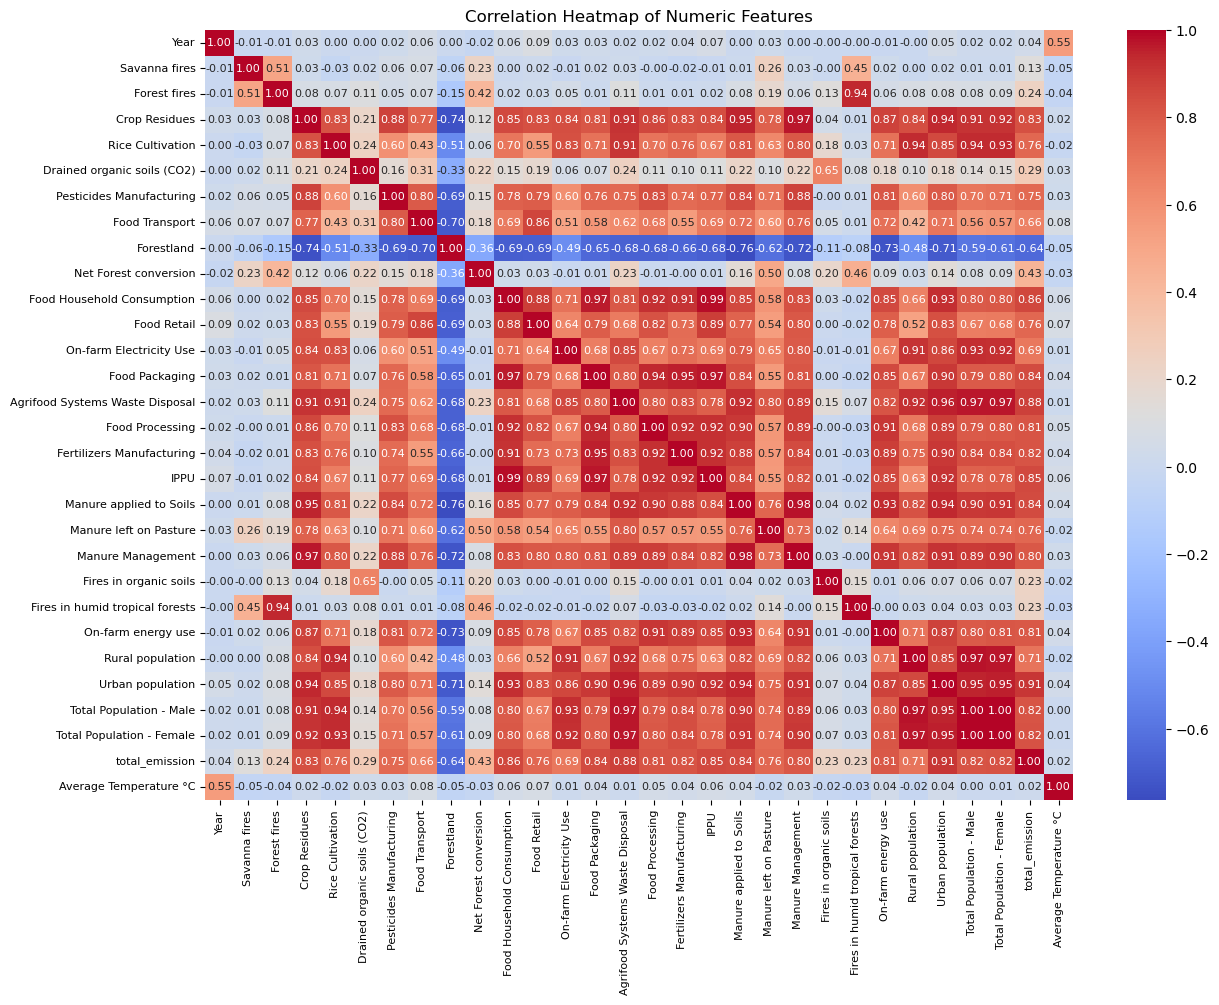

In [115]:
# Generate correlation heatmap with smaller font sizes
plt.figure(figsize=(14, 10))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8})
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Correlation Heatmap of Numeric Features', fontsize=12)
plt.show()

#How total emissions and average temperature correlate with other variables like population, manure management, food transport, etc.

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

Linear

In [118]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Define target and features
y = df['total_emission']  # Make sure the column name matches exactly
X = df.drop(columns=['total_emission'])

# Handle categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
ohe = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = pd.DataFrame(ohe.fit_transform(X[categorical_cols]))

# Keep only numeric columns and concatenate with encoded categoricals
X_numeric = X.drop(columns=categorical_cols).reset_index(drop=True)
X_encoded = pd.concat([X_numeric, X_encoded], axis=1)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}, R²: {r2:.2f}")


TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [ ]:
X = df.drop(columns=['total_emission'])  # Features
y = df['total_emission']  # Target

In [ ]:
from sklearn.preprocessing import OneHotEncoder
 
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
 
print(f"RMSE: {rmse}, R²: {r2}")

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}, R²: {r2}")



In [ ]:
# Drop non-numeric (categorical) columns
df_numeric = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Identify features highly correlated with the target
high_corr_features = correlation_matrix['total_emission'][correlation_matrix['total_emission'].abs() > 0.8].sort_values(ascending=False)

# Display the results
print("Features highly correlated with 'total_emission':")
print(high_corr_features)

In [ ]:
# Check which columns are in the DataFrame
print(df.columns)

# Then drop only those that exist
features_to_drop = [
    'urban_population', 'agrifood_systems_waste_disposal', 'food_household_consumption',
    'ippu', 'manure_applied_to_soils', 'food_packaging', 'crop_residues',
    'total_population_-_female', 'total_population_-_male', 'fertilizers_manufacturing',
    'food_processing', 'manure_management'
]

# Filter the list to only include columns that exist in the DataFrame
features_to_drop = [col for col in features_to_drop if col in df.columns]

# Now drop them safely
df = df.drop(columns=features_to_drop)


In [ ]:
 # Use a single feature for visualization
feature = 'Average Temperature °C'
X = df[[feature]]
y = df['total_emission']

# Train the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Best-fit line')
plt.xlabel(feature)
plt.ylabel('Total Emission')
plt.title('Linear Regression: Total Emission vs. Average Temperature')
plt.legend()
plt.grid(True)
plt.show()





Lasso

Mean Squared Error: 25158.000319875824
R² Score: 0.9999996363060945


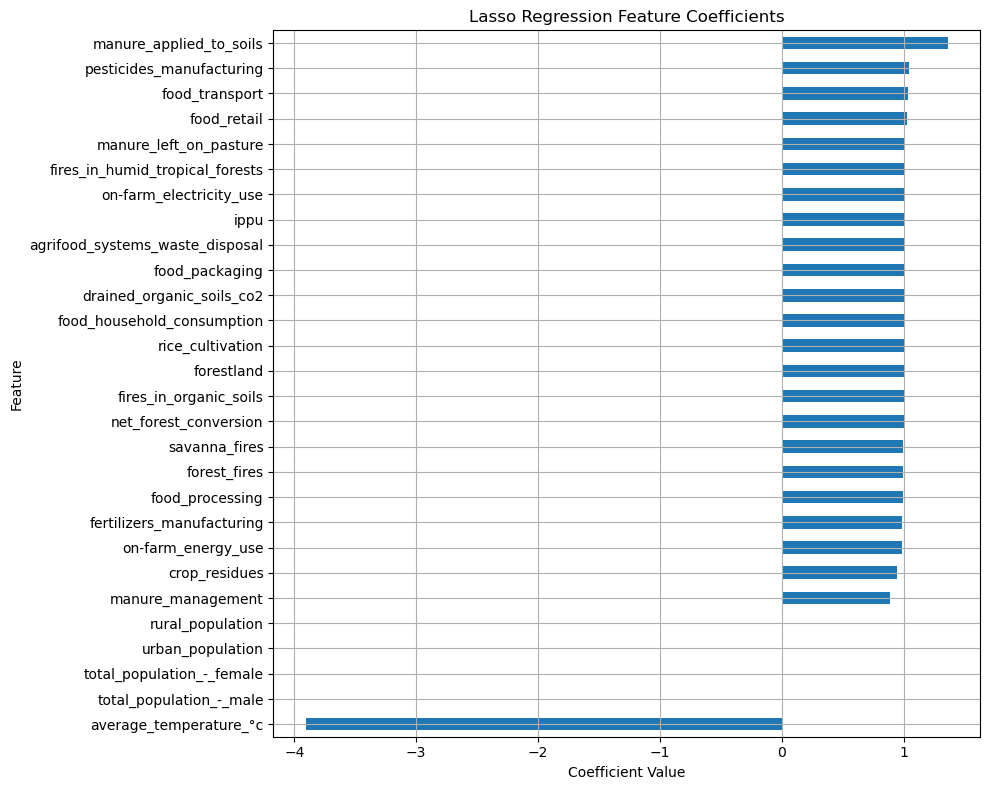

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_name = "co2_emissions_from_agri.csv"
df = pd.read_csv(file_name)

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Convert all columns to numeric where possible
df = df.apply(pd.to_numeric, errors='coerce')

# Drop non-numeric and irrelevant columns
df = df.drop(columns=['area', 'year'])

# Fill missing values with 0
df = df.fillna(0)

# Define features and target
target = 'total_emission'
X = df.drop(columns=[target])
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Lasso model
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

# Predict and evaluate
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Display feature coefficients
coefficients = pd.Series(lasso.coef_, index=X.columns)
non_zero_coefficients = coefficients[coefficients != 0]

# Plot the non-zero coefficients
plt.figure(figsize=(10, 8))
non_zero_coefficients.sort_values().plot(kind='barh')
plt.title('Lasso Regression Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()



In [123]:
# Assuming you have a model and predictions
residuals = observed_values - predicted_values

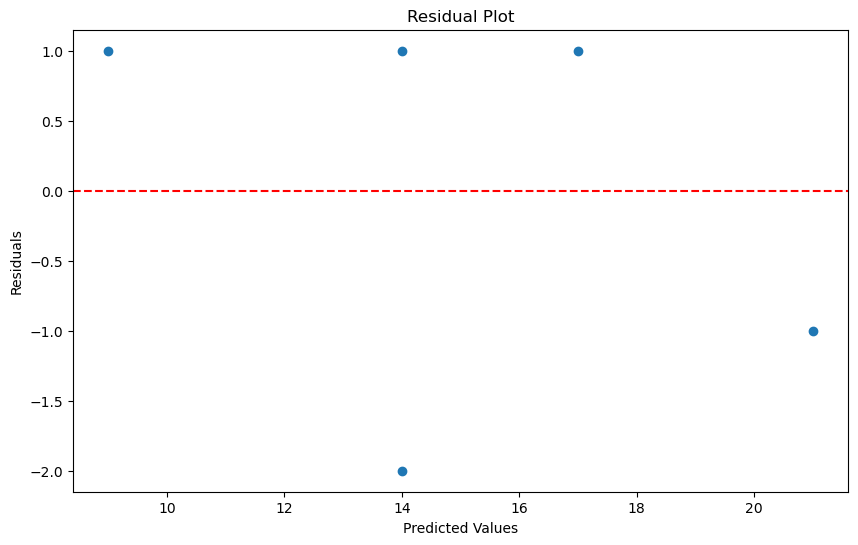

In [125]:
# Plot Residuals: Create a residual plot to visualize the residuals.

#Calculate Residuals: Residuals are the differences between the observed values and the predicted values from your model.

import numpy as np
import matplotlib.pyplot as plt

# Example data
observed_values = np.array([10, 12, 15, 18, 20])
predicted_values = np.array([9, 14, 14, 17, 21])

# Calculate residuals
residuals = observed_values - predicted_values

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
# 1. Check for Patterns: In a good model, residuals should be randomly distributed around zero. 
# Patterns or trends in the residual plot indicate potential issues with the model.

# 2. Normality of Residuals: Check if residuals are normally distributed using a histogram or a Q-Q plot.

import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

In [ ]:
# Decision Tree Regression Example: to test your data and perform residual analysis.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Example data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 4, 9, 16, 25])

# Create and fit the model
model = DecisionTreeRegressor()
model.fit(X, y)

# Predictions
predicted_values = model.predict(X)

# Calculate residuals
residuals = y - predicted_values

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

---
<a href=#nine></a>
## **Conclusion**
<a href=#cont>Back to Table of Contents</a>